# Task 1
By using graph data structure, develop a Python program, which generates the above image. Replace the edge labels, which are currently letters, with the actual distances between the stations, in kilometers or miles. Use online map services, such as Apple Maps or Google Maps, to approximate the distances.

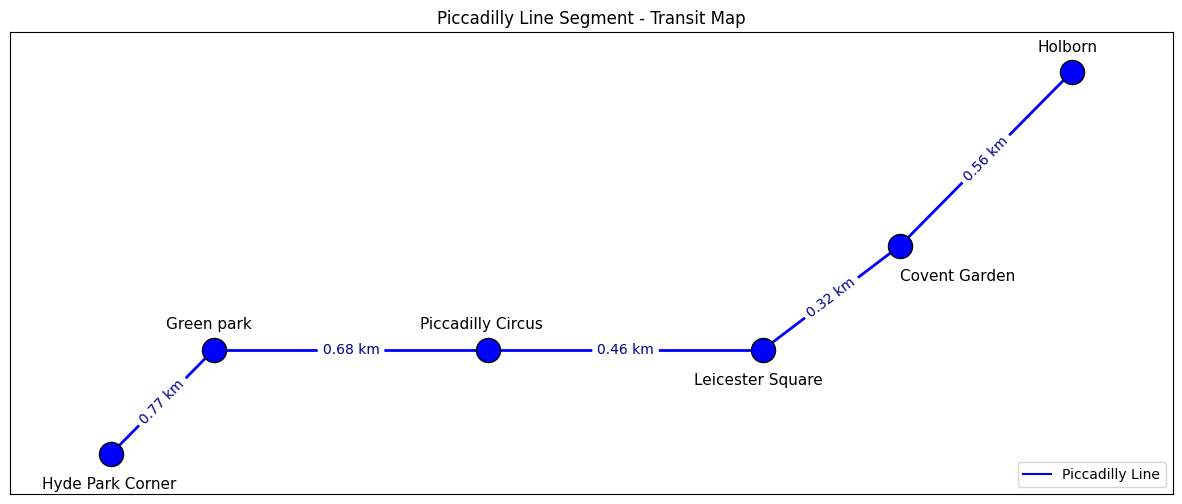

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


def draw_node_labels(edge_label_coords: list[dict], text_size: int = 11):
    for item in edge_label_coords:
        plt.text(item["pos"]["x"], item["pos"]["y"], s=item["s"], size=text_size)


class MapGraph(nx.Graph):
    def add_node_to_graph(self, df):
        for index, row in df.iterrows():
            self.add_node(row["Station"], pos=(row["Latitude"], row["Longitude"]))
    
    def add_edge_to_graph(self, df):
        for index, row in df.iterrows():
            distance = row["Distance"]
            if row["Unit"] == "m":
                distance /= 1000
            self.add_edge(row["StartStation"], row["EndStation"], distance=f"{distance:.2f} km")


col_names = ["Station", "Latitude", "Longitude", "Color"]
subway_df = pd.read_csv("subway_station_dataset.csv", usecols=col_names, na_values=["N/A", "Unknown"])
subway_df.dropna()
subway_df.drop_duplicates()

distance_df_colname = ["StartStation", "EndStation", "Distance", "Unit"]
distance_df = pd.read_csv("subway_station_distance.csv", usecols=distance_df_colname, na_values=["N/A", "Unknown"])
subway_df.dropna()
subway_df.drop_duplicates()

G = MapGraph()

G.add_node_to_graph(subway_df)
G.add_edge_to_graph(distance_df)

# Get positions from node attributes
pos = nx.get_node_attributes(G, 'pos')

# Plotting
plt.figure(figsize=(15, 6))

# Draw nodes with enhanced styling
nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=300, edgecolors='black')

# Draw edges with different color and style
nx.draw_networkx_edges(G, pos, edge_color='blue', width=2)

# Draw edge labels with distances
edge_labels = nx.get_edge_attributes(G, 'distance')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='darkblue')

text_size = 11
edge_label_coords = [
    # Piccadilly Label
    {"s": "Hyde Park Corner", "pos": {"x": 25, "y": 30}},
    {"s": "Green park", "pos": {"x": 43, "y": 53}},
    {"s": "Piccadilly Circus", "pos": {"x": 80, "y": 53}},
    {"s": "Leicester Square", "pos": {"x": 120, "y": 45}},
    {"s": "Covent Garden","pos": {"x": 150, "y": 60}},
    {"s": "Holborn", "pos": {"x": 170, "y": 93}},
]

draw_node_labels(edge_label_coords, text_size=text_size)

# Add a custom legend
plt.plot([], [], color="blue", label="Piccadilly Line")  # Dummy plot for legend
plt.legend(loc="lower right")

# Display the title and remove axes
plt.title("Piccadilly Line Segment - Transit Map")

# Save Graph to image
plt.savefig("task1.png")
plt.show()